In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [5]:
def file_get_contents(filename):
    with open(filename) as f:
        return f.read()

In [6]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import json

file_json_contents = file_get_contents("./files_parseds/ALEXIS PEDRÃO_260001087378.json")
json_data = json.loads(file_json_contents)
content_pages = [content["text"] for content in json_data["content"]]

In [7]:
tfIdfVectorizer=TfidfVectorizer(use_idf=True, ngram_range=(1,2))
tfIdf = tfIdfVectorizer.fit_transform(content_pages)
df = pd.DataFrame(tfIdf[0].T.todense(), index=tfIdfVectorizer.get_feature_names(), columns=["TF-IDF"])
df = df.sort_values('TF-IDF', ascending=False)
df_word = df.head(50)
expressions_clear = ["de","a","o","que","e","do","da","em","um","para","é","com","não","uma","os","no","se","na","por","mais","as","dos","como","mas","foi","ao","ele","das","tem","à","seu","sua","ou","ser","quando","muito","há","nos","já","está","eu","também","só","pelo","pela","até","isso","ela","entre","era","depois","sem","mesmo","aos","ter","seus","quem","nas","me","esse","eles","estão","você","tinha","foram","essa","num","nem","suas","meu","às","minha","têm","numa","pelos","elas","havia","seja","qual","será","nós","tenho","lhe","deles","essas","esses","pelas","este","fosse","dele","tu","te","vocês","vos","lhes","meus","minhas","teu","tua","teus","tuas","nosso","nossa","nossos","nossas","dela","delas","esta","estes","estas","aquele","aquela","aqueles","aquelas","isto","aquilo","estou","está","estamos","estão","estive","esteve","estivemos","estiveram","estava","estávamos","estavam","estivera","estivéramos","esteja","estejamos","estejam","estivesse","estivéssemos","estivessem","estiver","estivermos","estiverem","hei","há","havemos","hão","houve","houvemos","houveram","houvera","houvéramos","haja","hajamos","hajam","houvesse","houvéssemos","houvessem","houver","houvermos","houverem","houverei","houverá","houveremos","houverão","houveria","houveríamos","houveriam","sou","somos","são","era","éramos","eram","fui","foi","fomos","foram","fora","fôramos","seja","sejamos","sejam","fosse","fôssemos","fossem","for","formos","forem","serei","será","seremos","serão","seria","seríamos","seriam","tenho","tem","temos","tém","tinha","tínhamos","tinham","tive","teve","tivemos","tiveram","tivera","tivéramos","tenha","tenhamos","tenham","tivesse","tivéssemos","tivessem","tiver","tivermos","tiverem","terei","terá","teremos","terão","teria","teríamos","teriam"]

sentences_dictionary = {}

for sentence, row in df_word.iterrows():
    if sentence not in expressions_clear:
        sentences_dictionary[sentence] = row["TF-IDF"]

print(sentences_dictionary)

{'aracaju': 0.17121584987023516, 'durante pandemia': 0.15083734782930336, 'psol aracaju': 0.1439943986561553, 'pandemia': 0.1435605132884834, 'durante': 0.14168474687299265, 'psol': 0.11312801087197752, 'queremos': 0.0959962657707702, 'que estão': 0.0959962657707702, 'construção da': 0.0959962657707702, 'uma proposta': 0.0959962657707702, 'eleições': 0.0959962657707702, 'do psol': 0.08745579350562607, 'aracaju durante': 0.08745579350562607, 'de aracaju': 0.07232486567238486, 'proposta': 0.07084237343649633, 'toda': 0.0633815543236773, 'programa': 0.0633815543236773, 'construção': 0.05484108205853318, 'etc que': 0.05401669268087229, 'pandemia de': 0.05401669268087229, 'maioria inicialmente': 0.05401669268087229, 'intervenção': 0.05401669268087229, 'de construção': 0.05401669268087229, 'acima': 0.05401669268087229, 'pandemia atuação': 0.05401669268087229, 'acima do': 0.05401669268087229, 'dificuldades': 0.05401669268087229, 'intervenção nas': 0.05401669268087229, 'dificuldades durante': 

/home/nathanfeitoza/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


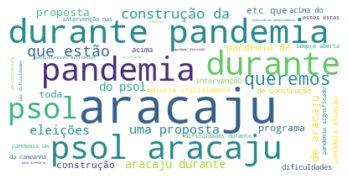

In [8]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

words_cloud = WordCloud(background_color="white", max_words=50).generate_from_frequencies(sentences_dictionary)

plt.imshow(words_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()